# These are the Cartography visuals.

# To Do:
- make HA only and HA + NA sections, get snakemake notebook_docs folder ready

# Imports Section 

In [1]:
import sys
sys.path.append("../notebooks/scripts/")

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
#from reportlab.graphics import renderPDF
import seaborn as sns
#from svglib.svglib import svg2rlg

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

%matplotlib inline

In [3]:
alt.renderers.set_embed_options(
    padding={"left": 0, "right": 0, "bottom": 1, "top": 1}
)

RendererRegistry.enable('default')

In [4]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 100
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 8
mpl.rc('text', usetex=False)

In [5]:
try: 
    snakemake.input.node_df
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver

    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


## Pathogen-specific variables

Consider consolidating these into a single configuration file that can be passed to the notebook as a command line argument for more scriptable generation of these figures.

# Flu Specific Variables

In [6]:
try:
    node_df_ha = snakemake.input.node_df_ha,

    pca_df_ha = snakemake.input.pca_df_ha,
    explained_variance_pca_ha = snakemake.input.explained_variance_pca_ha,

    pca_df_concatenated = snakemake.input.pca_df_concatenated,
    explained_variance_pca_concatenated = snakemake.input.explained_variance_pca_concatenated,

    mds_df_ha = snakemake.input.mds_df_ha,
    mds_df_concatenated = snakemake.input.mds_df_concatenated,

    #KDE Density:

    KDE_mds_ha = snakemake.input.KDE_mds_ha,
    KDE_mds_metadata_ha = snakemake.input.KDE_mds_metadata_ha,

    KDE_mds_concatenated = snakemake.input.KDE_mds_concatenated,
    KDE_mds_metadata_concatenated = snakemake.input.KDE_mds_metadata_concatenated,

    KDE_umap_ha = snakemake.input.KDE_umap_ha,
    KDE_umap_metadata_ha = snakemake.input.KDE_umap_metadata_ha,

    KDE_umap_concatenated = snakemake.input.KDE_umap_concatenated,
    KDE_umap_metadata_concatenated = snakemake.inputKDE_umap_metadata_concatenated,

    KDE_genetic = snakemake.input.KDE_genetic,
    KDE_genetic_metadata_ha = snakemake.input.KDE_genetic_metadata_ha,

    KDE_genetic = snakemake.input.KDE_genetic,
    KDE_genetic_metadata_concatenated = snakemake.input.KDE_genetic_metadata_concatenated
    
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


In [66]:
clades_to_plot = ['3c2', '3c2.A', '3c3.A', 'A1','A1b', 'A1b/131K','A1b/135K', 'A1b/135N', 'A1b/137F', 'A1b/186D', 'A1b/197R', 'A1b/94N', 'A2', 'A2/re', 'A3']
domain =   ['3c', '3c2', '3c2.A', '3c3', '3c3.A', 'A1', 'A1a', 'A1b', 'A1b/131K','A1b/135K', 'A1b/135N', 'A1b/137F', 'A1b/186D', 'A1b/197R', 'A1b/94N', 'A2', 'A2/re', 'A3', 'A4']
range_ = ['#4e38d5', '#6626d4', '#4138c3', '#4c89e8', '#4e70ff', '#5499ff', '#79c9a1', '#61b8f0', '#5499ff', '#87dfb3','#a0e994', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e', '#ffc348', '#ff9e40', '#ff6e36', '#f93529']


# Reading in all the data from the scripts

In [8]:
import os

os.getcwd()

'/mnt/c/Work/BedfordProjects/cartography/ha-na-nextstrain'

In [9]:
#node_df = pd.read_csv(node_df, sep="\t")
node_df_ha = pd.read_csv("results/table_ha.tsv", sep="\t")

In [10]:
node_df_ha.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [11]:
node_df_ha.head()

strain     date  pca1  pca2  pca3  pca4   mds1   mds2  \
0  A/RobatKarim/21210/2016  2016.05  4.12  0.42 -0.28 -0.21  19.39  -0.91   
1  A/MUWRP-Uganda/579/2016  2016.67  4.91  1.18 -0.48  0.10  33.07  21.34   
2         A/Sydney/29/2016  2016.03  6.52  1.08 -0.50  0.36  31.32 -17.25   
3   A/Pennsylvania/08/2016  2016.02  6.55  1.09 -0.51  0.37  31.73 -16.46   
4       A/Arkansas/02/2016  2016.08  6.52  1.09 -0.50  0.36  34.50   9.64   

   tsne_x  tsne_y  umap_x  umap_y clade_membership  pca_label  mds_label  \
0   12.62    1.28    3.96   17.76              3c3         -1         -1   
1   13.53   -1.19  -11.96    3.24              3c3         -1         -1   
2   12.11    2.10  -12.19    2.34              3c3         -1          0   
3   12.15    2.05  -12.30    2.47              3c3         -1          0   
4   12.14    2.04  -12.22    2.35              3c3         -1          0   

   umap_label  t-sne_label  y  
0           5           -1  1  
1           3           15  2  
2           3           -1  3  
3           3           -1  4  
4           3           -1  5

In [12]:
all_clades = node_df_ha["clade_membership"].drop_duplicates().values

In [13]:
all_clades

array(['3c3', '3c3.A', '3c2', 'A4', 'A3', '3c2.A', 'A2', 'A2/re', 'A1',
       'A1a', 'A1b', 'A1b/135K', 'A1b/135N'], dtype=object)

In [14]:
set(domain)

{'3c',
 '3c2',
 '3c2.A',
 '3c3',
 '3c3.A',
 'A1',
 'A1a',
 'A1b',
 'A1b/131K',
 'A1b/135K',
 'A1b/135N',
 'A1b/137F',
 'A1b/186D',
 'A1b/197R',
 'A1b/94N',
 'A2',
 'A2/re',
 'A3',
 'A4'}

In [15]:
set(all_clades) - set(domain)

set()

In [16]:
node_df_ha.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [17]:
node_df_ha.head()

strain     date  pca1  pca2  pca3  pca4   mds1   mds2  \
0  A/RobatKarim/21210/2016  2016.05  4.12  0.42 -0.28 -0.21  19.39  -0.91   
1  A/MUWRP-Uganda/579/2016  2016.67  4.91  1.18 -0.48  0.10  33.07  21.34   
2         A/Sydney/29/2016  2016.03  6.52  1.08 -0.50  0.36  31.32 -17.25   
3   A/Pennsylvania/08/2016  2016.02  6.55  1.09 -0.51  0.37  31.73 -16.46   
4       A/Arkansas/02/2016  2016.08  6.52  1.09 -0.50  0.36  34.50   9.64   

   tsne_x  tsne_y  umap_x  umap_y clade_membership  pca_label  mds_label  \
0   12.62    1.28    3.96   17.76              3c3         -1         -1   
1   13.53   -1.19  -11.96    3.24              3c3         -1         -1   
2   12.11    2.10  -12.19    2.34              3c3         -1          0   
3   12.15    2.05  -12.30    2.47              3c3         -1          0   
4   12.14    2.04  -12.22    2.35              3c3         -1          0   

   umap_label  t-sne_label  y  
0           5           -1  1  
1           3           15  2  
2           3           -1  3  
3           3           -1  4  
4           3           -1  5

# Running PCA on Scaled and Centered Data
- I treated each nucleotide as a "site", or dimension, and found the probability of having a certain nucleotide given the frequency of that letter at that site.
- I used [this paper][1] as my source 
- The equation is as follows where C is the matrix of dimensions, M is the mean, and p is the frequency of a nucleotide at that given site. 
![](https://journals.plos.org/plosgenetics/article/file?type=thumbnail&id=info:doi/10.1371/journal.pgen.0020190.e003)

In [18]:
#principalDf = pd.read_csv(pca_df, index_col=0)
principalDf_ha = pd.read_csv("results/embed_pca_ha.csv", index_col=0)
principalDf_concatenated = pd.read_csv("results/embed_pca_concatenated.csv", index_col=0)

In [19]:
#explained_variance_df = pd.read_csv(explained_variance_pca)
explained_variance_df_ha = pd.read_csv("results/explained_variance_pca_ha.csv")
explained_variance_df_concatenated = pd.read_csv("results/explained_variance_pca_concatenated.csv")

In [20]:
explained_variance_df_ha

explained variance  principal components
0              0.2652                     1
1              0.2039                     2
2              0.0826                     3
3              0.0528                     4
4              0.0334                     5
5              0.0262                     6
6              0.0209                     7
7              0.0146                     8
8              0.0116                     9
9              0.0113                    10

In [21]:
explained_variance_df_concatenated

explained variance  principal components
0              0.4392                     1
1              0.1335                     2
2              0.0751                     3
3              0.0492                     4
4              0.0251                     5
5              0.0179                     6
6              0.0165                     7
7              0.0150                     8
8              0.0109                     9
9              0.0095                    10

Text(0.5, 1.0, 'Explained Variance Plot (Flu, HA-only)')

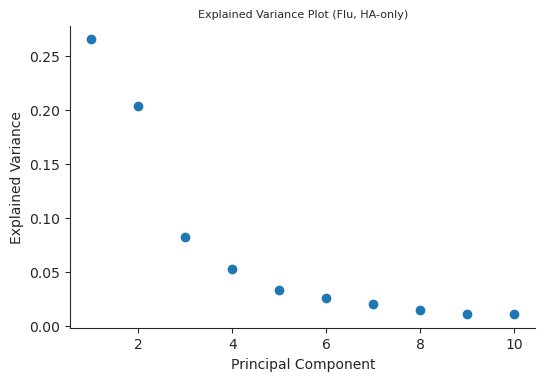

In [22]:
plt.plot(explained_variance_df_ha['principal components'].values.tolist(), explained_variance_df_ha["explained variance"].values.tolist(), 'o')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

plt.title(f"Explained Variance Plot (Flu, HA-only)")

Text(0.5, 1.0, 'Explained Variance Plot (Flu, HA and NA)')

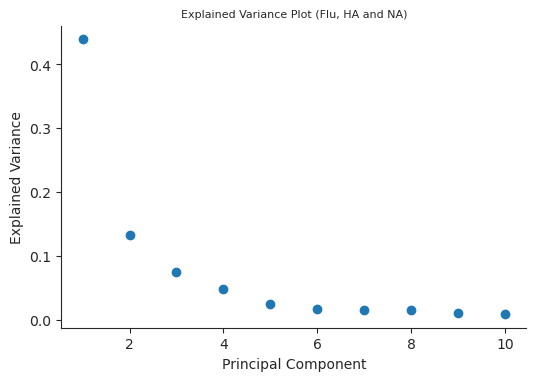

In [23]:
plt.plot(
    explained_variance_df_concatenated['principal components'].values.tolist(),
    explained_variance_df_concatenated["explained variance"].values.tolist(),
    'o'
)

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

plt.title(f"Explained Variance Plot (Flu, HA and NA)")

In [24]:
merged_pca_df_ha = principalDf_ha.merge(node_df_ha[["strain", "date", "y", "clade_membership"]], on="strain")
merged_pca_df_concatenated = principalDf_concatenated.merge(node_df_ha[["strain", "date", "y", "clade_membership"]], on="strain")

In [25]:
explained_variance_PCA_ha = explained_variance_df_ha["explained variance"].values.tolist()
explained_variance_PCA_concatenated = explained_variance_df_concatenated["explained variance"].values.tolist()

### Bases Missing Analysis for PCA 

In [26]:
from Bio import SeqIO
strains = []
genomes = []
for record in SeqIO.parse("results/aligned_concatenated.fasta", "fasta"):
    strains.append(str(record.id))
    genomes.append(str(record.seq))

#Checking missing_bases

genomes_missing_bases = []
for x in genomes:
    x = re.sub(r'[^AGCT]', '5', x)
    numberOfN = x.count("5") #This logic is here because MERS uses both "N" and "-" to dileneate missing sequences.
    genomes_missing_bases.append(numberOfN)
    
bases_df = pd.DataFrame([strains, genomes_missing_bases]).transpose()
bases_df.columns = ["strain", "bases_missing"]

In [27]:
strains = []
genomes = []
for record in SeqIO.parse("results/aligned_ha.fasta", "fasta"):
    strains.append(str(record.id))
    genomes.append(str(record.seq))

#Checking missing_bases

genomes_missing_bases = []
for x in genomes:
    x = re.sub(r'[^AGCT]', '5', x)
    numberOfN = x.count("5") #This logic is here because MERS uses both "N" and "-" to dileneate missing sequences.
    genomes_missing_bases.append(numberOfN)
    
bases_df_ha = pd.DataFrame([strains, genomes_missing_bases]).transpose()
bases_df_ha.columns = ["strain", "bases_missing"]
merged_total_ha = bases_df.merge(merged_pca_df_ha, on="strain")

In [28]:
merged_total = bases_df.merge(merged_pca_df_concatenated, on="strain")
merged_total

strain bases_missing       pca1      pca2  \
0      A/Shandong-Fushan/164/2017            26  12.255720 -1.610799   
1     A/Shandong-Fushan/1726/2016            26  12.257490 -1.611826   
2     A/Shandong-Fushan/1157/2017            26  12.261529 -1.566397   
3       A/Shandong-Zhifu/148/2017            26  12.245232 -1.348739   
4              A/China/81129/2017            26  12.249586 -1.231314   
...                           ...           ...        ...       ...   
1638             A/Texas/305/2017             1  -2.826011  7.975306   
1639          A/Louisiana/17/2017             0  -3.344733  7.866046   
1640         A/Georgia/68828/2018            26  11.934115  8.315302   
1641      A/RobatKarim/21210/2016            26  11.993968  5.597106   
1642      A/MUWRP-Uganda/579/2016             0  -3.321925  6.289055   

          pca3      pca4      pca5      pca6      pca7      pca8      pca9  \
0     3.972264 -0.637044  0.806122  0.006260 -0.495263 -0.708579 -0.736941   
1     3.977378 -0.639136  0.805380  0.016755 -0.505064 -0.706969 -0.741165   
2     3.793219 -0.088506  0.916768  0.030151 -0.434889 -0.802020 -0.882564   
3     3.743369 -0.829084  0.166591  0.415142 -0.714510 -0.544365 -1.271251   
4     4.030465 -0.760923  0.745592  0.180475 -0.521916 -0.698541 -0.868992   
...        ...       ...       ...       ...       ...       ...       ...   
1638  0.398138  1.015962  1.023211  3.739937 -1.338797  2.650178  0.234474   
1639  0.385793  1.046642  1.001844  4.035179 -1.592932  2.525260  0.604977   
1640  0.092739  0.843142  1.367683  4.123355 -1.334214  1.877863 -0.074457   
1641 -0.217531 -0.401829  0.671749  0.921810 -0.713130 -0.089734 -0.152683   
1642  0.821978 -0.824434 -0.157834  0.189158 -0.438623 -0.146278  0.754663   

         pca10  pca_label     date    y clade_membership  
0     0.776481          5  2017.12  623               A2  
1     0.790294          5  2016.86  614               A2  
2     0.926185          5  2017.18  622               A2  
3     1.195165          5  2017.12  615               A2  
4     0.801492          5  2017.01  616               A2  
...        ...        ...      ...  ...              ...  
1638 -0.215195          1  2017.91    7            3c3.A  
1639 -0.329844          1  2017.17    6            3c3.A  
1640 -0.346391         -1  2018.02    8            3c3.A  
1641 -0.169223          0  2016.05    1              3c3  
1642  0.053975         -1  2016.67    2              3c3  

[1643 rows x 16 columns]

In [29]:
list_of_chart_ha = linking_tree_with_plots_brush(merged_total_ha,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[5]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership", "bases_missing"], domain, range_)

list_of_chart_concatenated = linking_tree_with_plots_brush(merged_total,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[5]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership", "bases_missing"], domain, range_)
PCAFluBrush_ha = list_of_chart_ha[0]|list_of_chart_ha[1]|list_of_chart_ha[2]
PCAFluBrush_concatenated = list_of_chart_concatenated[0]|list_of_chart_concatenated[1]|list_of_chart_concatenated[2]

alt.vconcat(PCAFluBrush_ha,PCAFluBrush_concatenated)
#PCAFluBrush.save("docs/PCAHaNaBrush.html")

alt.VConcatChart(...)

In [30]:
list_of_chart_concatenated = linking_tree_with_plots_brush(merged_total_ha,['pca1','pca2'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[1]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership", "bases_missing"], domain, range_)

PCAFluBrush_concatenated = list_of_chart_concatenated[0]|list_of_chart_concatenated[1]
#PCAFluBrush_concatenated.save("../docs/PCAFluBrushHA_.html")

# Running MDS on the Dataset

In [31]:
#MDS_df = pd.read_csv(mds_df,index_col=0)
MDS_df_ha = pd.read_csv("results/embed_mds_ha.csv",index_col=0)
MDS_df_concatenated = pd.read_csv("results/embed_mds_concatenated.csv",index_col=0)

In [32]:
merged_mds_df_ha = MDS_df_ha.merge(node_df_ha[["strain", "date", "y", "clade_membership"]], on="strain")
merged_mds_df_concatenated = MDS_df_concatenated.merge(node_df_ha[["strain", "date", "y", "clade_membership"]], on="strain")

In [33]:
merged_mds_df_ha

strain       mds1       mds2  mds_label     date  \
0      A/Shandong-Fushan/164/2017  -5.565025 -14.193406         -1  2017.12   
1     A/Shandong-Fushan/1726/2016  -9.831928 -14.217406         -1  2016.86   
2     A/Shandong-Fushan/1157/2017  -5.682448 -15.476746         -1  2017.18   
3       A/Shandong-Zhifu/148/2017  -4.262457 -15.543564         -1  2017.12   
4              A/China/81129/2017  -4.177646 -17.114859         -1  2017.01   
...                           ...        ...        ...        ...      ...   
1638             A/Texas/305/2017  37.139546 -21.705270          0  2017.91   
1639          A/Louisiana/17/2017  42.841773  13.455014          0  2017.17   
1640         A/Georgia/68828/2018  38.748407  11.680307          0  2018.02   
1641      A/RobatKarim/21210/2016  19.386156  -0.907349         -1  2016.05   
1642      A/MUWRP-Uganda/579/2016  33.067913  21.340629         -1  2016.67   

        y clade_membership  
0     623               A2  
1     614               A2  
2     622               A2  
3     615               A2  
4     616               A2  
...   ...              ...  
1638    7            3c3.A  
1639    6            3c3.A  
1640    8            3c3.A  
1641    1              3c3  
1642    2              3c3  

[1643 rows x 7 columns]

In [34]:
chart_12_mds = scatterplot_with_tooltip_interactive(merged_mds_df_ha,'mds1','mds2',"mds1","mds2",['strain','clade_membership'],'clade_membership:N', domain, range_)
chart_12_mds

alt.Chart(...)

In [35]:
list_of_chart_ha = linking_tree_with_plots_brush(merged_mds_df_ha,['mds1','mds2'],["MDS1", "MDS2"], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart_ha = list_of_chart_ha[0]|list_of_chart_ha[1]
list_of_chart_concatenated = linking_tree_with_plots_brush(merged_mds_df_concatenated,['mds1','mds2'],["MDS1", "MDS2"], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart_concat = list_of_chart_concatenated[0]|list_of_chart_concatenated[1]
alt.vconcat(chart_ha, chart_concat)

alt.VConcatChart(...)

# Running T-SNE on the Dataset 

In [36]:
TSNE_df_ha = pd.read_csv("results/embed_t-sne_ha.csv",index_col=0)
TSNE_df_concatenated = pd.read_csv("results/embed_t-sne_concatenated.csv",index_col=0)

In [37]:
merged_tsne_df_ha = TSNE_df_ha.merge(node_df_ha[["strain", "date", "y", "clade_membership"]], on="strain")
merged_tsne_df_concatenated = TSNE_df_concatenated.merge(node_df_ha[["strain", "date", "y", "clade_membership"]], on="strain")

In [38]:
scatterplot_with_tooltip_interactive(merged_tsne_df_ha,'tsne_x','tsne_y','tsne_x','tsne_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [39]:
scatterplot_with_tooltip_interactive(merged_tsne_df_concatenated,'tsne_x','tsne_y','tsne_x','tsne_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [40]:
list_of_chart_ha = linking_tree_with_plots_brush(
    merged_tsne_df_ha,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'clade_membership:N',
    ["strain:N", "clade_membership:N"],
    domain,
    range_
)
chart_tsne_ha = list_of_chart_ha[0]|list_of_chart_ha[1]
chart_tsne_ha

alt.HConcatChart(...)

In [41]:
list_of_chart_concatenated = linking_tree_with_plots_brush(
    merged_tsne_df_concatenated,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'clade_membership:N',
    ["strain:N", "clade_membership:N"],
    domain,
    range_
)
chart_tsne_concatenated = list_of_chart_concatenated[0]|list_of_chart_concatenated[1]
chart_tsne_concatenated

alt.HConcatChart(...)

In [42]:
chart_tsne_ha & chart_tsne_concatenated

alt.VConcatChart(...)

# Running UMAP on the Dataset

In [43]:
UMAP_df_ha = pd.read_csv("results/embed_umap_ha.csv",index_col=0)
UMAP_df_concatenated = pd.read_csv("results/embed_umap_concatenated.csv",index_col=0)

In [44]:
UMAP_df_concatenated

umap_x     umap_y  umap_label
strain                                                      
A/Shandong-Fushan/164/2017   8.951368  13.601989           2
A/Shandong-Fushan/1726/2016  8.766578  15.873294           2
A/Shandong-Fushan/1157/2017  9.213216  15.907959           2
A/Shandong-Zhifu/148/2017    9.523652  15.425406           2
A/China/81129/2017           9.583848  16.815080           2
...                               ...        ...         ...
A/Texas/305/2017            -6.053029   2.111004           0
A/Louisiana/17/2017         -6.128171   2.204075           0
A/Georgia/68828/2018        -5.983295   2.011862           0
A/RobatKarim/21210/2016      2.495441  -0.773218           4
A/MUWRP-Uganda/579/2016     -6.565435   1.480318           0

[1643 rows x 3 columns]

In [45]:
merged_umap_df_ha = UMAP_df_ha.merge(node_df_ha[["strain", "date", "y", "clade_membership"]], on="strain")
merged_umap_df_concatenated = UMAP_df_concatenated.merge(node_df_ha[["strain", "date", "y", "clade_membership"]], on="strain")

In [46]:
UMAP_df_ha.index.tolist() == UMAP_df_concatenated.index.values.tolist()

True

# HA and NA analysis

In [47]:
UMAP_df_ha = pd.read_csv("results/embed_umap_ha.csv",index_col=0)
UMAP_df_concatenated = pd.read_csv("results/embed_umap_concatenated.csv",index_col=0)

In [48]:
merged_umap_df_ha = UMAP_df_ha.merge(node_df_ha[["strain", "date", "y", "clade_membership"]], on="strain")
merged_umap_df_concatenated = UMAP_df_concatenated.merge(node_df_ha[["strain", "date", "y", "clade_membership"]], on="strain")

In [49]:
import numpy as np

In [50]:
from scipy.spatial import procrustes
a = np.array([list(a) for a in zip(UMAP_df_ha['umap_x'].values.tolist(), UMAP_df_ha['umap_y'].values.tolist())])
b = np.array([list(a) for a in zip(UMAP_df_concatenated['umap_x'].values.tolist(), UMAP_df_concatenated['umap_y'].values.tolist())])
mtx1, mtx2, disparity = procrustes(a, b)

In [51]:
df1 = pd.DataFrame(mtx1.tolist(), columns =["umap_ha_scaled_x", "umap_ha_scaled_y"])  
df2 = pd.DataFrame(mtx2.tolist(), columns =["umap_concat_scaled_x", "umap_concat_scaled_y"])  
merged_scaled_df = pd.merge(df1, df2, left_index=True, right_index=True)

In [52]:
merged_umap_df_ha

strain     umap_x     umap_y  umap_label     date  \
0          A/Michigan/59/2016  -6.536393   5.505621           3  2016.14   
1          A/Michigan/51/2016  -6.301831   5.572242           3  2016.20   
2            A/Perth/78A/2016  -6.650386   5.559973           3  2016.58   
3          A/Delaware/01/2016  -5.069305   4.886901           3  2016.03   
4            A/Hawaii/05/2016  -5.149574   4.942784           3  2016.01   
...                       ...        ...        ...         ...      ...   
1638       A/Arkansas/02/2016 -11.622848  10.726708           5  2016.08   
1639   A/Pennsylvania/08/2016 -11.945612  10.909333           5  2016.02   
1640         A/Kenya/036/2017 -11.228062  11.071293           5  2017.54   
1641  A/RobatKarim/21210/2016   9.858374  17.731339           0  2016.05   
1642  A/MUWRP-Uganda/579/2016 -11.089597  10.465687           5  2016.67   

         y clade_membership  
0      954               A1  
1      955               A1  
2      956               A1  
3     1057               A1  
4      987               A1  
...    ...              ...  
1638     4              3c3  
1639     5              3c3  
1640   116            3c3.A  
1641     1              3c3  
1642     2              3c3  

[1643 rows x 7 columns]

In [53]:
merged_scaled_df["strain"] = merged_umap_df_ha["strain"].values.tolist()
merged_scaled_df["clade_membership"] = merged_umap_df_ha["clade_membership"].values.tolist()
merged_scaled_df["date"] = node_df_ha["date"].values.tolist()

In [54]:
chart2 = scatterplot_with_tooltip_interactive(merged_scaled_df,"umap_concat_scaled_x", "umap_concat_scaled_y","umap_concat_scaled_x", "umap_concat_scaled_y",['strain', "clade_membership"],'clade_membership:N', domain, range_)
chart1 = scatterplot_with_tooltip_interactive(merged_scaled_df,"umap_ha_scaled_x", "umap_ha_scaled_y","umap_ha_scaled_x", "umap_ha_scaled_y",['strain', "clade_membership"],'clade_membership:N', domain, range_)

chart1|chart2

alt.HConcatChart(...)

In [55]:
Ax = merged_scaled_df["umap_concat_scaled_x"].to_numpy()
Ay = merged_scaled_df["umap_concat_scaled_y"].to_numpy()
Ox = merged_scaled_df["umap_ha_scaled_x"].to_numpy()
Oy = merged_scaled_df["umap_ha_scaled_y"].to_numpy()

In [56]:
distance = np.sqrt(np.sum(((Ax-Ox)**2, (Ay-Oy)**2), axis=0))
merged_scaled_df["distance"] = distance
classifier_threshold = (np.mean(distance) + (1*np.std(distance)))
estimated_outlier_status = np.where(distance < classifier_threshold, -1, 1)

merged_scaled_df["reassorted"] = estimated_outlier_status

In [57]:
alt.Chart(merged_scaled_df).mark_bar().encode(
    alt.X("distance", bin=alt.Bin(step=0.0005)),
    y='count()',
    color="reassorted:N"
)

alt.Chart(...)

In [58]:
UMAPChart = alt.Chart(merged_scaled_df).mark_circle(size=60).encode(
    x='umap_ha_scaled_x',
    y='umap_ha_scaled_y',
    color='reassorted:N',
    tooltip=['strain', "clade_membership"]
).interactive()
save(UMAPChart, snakemake.output.umapChartPNG)
UMAPChart.save(snakemake.output.umapChart)

NameError: name 'snakemake' is not defined

In [ ]:
plot = sns.catplot(x="clade_membership", y="distance", kind="box", data=merged_scaled_df, height=4, aspect = 2)
plot.savefig(snakemake.output.UMAPBoxplot)

# Procrustes Analysis

In [59]:
import numpy as np

In [60]:
from scipy.spatial import procrustes
a = np.array([list(a) for a in zip(merged_umap_df_ha['umap_x'].values.tolist(), merged_umap_df_ha['umap_y'].values.tolist())])
b = np.array([list(a) for a in zip(merged_umap_df_concatenated['umap_x'].values.tolist(), merged_umap_df_concatenated['umap_y'].values.tolist())])
mtx1, mtx2, disparity = procrustes(a, b)

In [61]:
b

array([[ 9.115451 , -4.969537 ],
       [ 9.252586 , -5.4839725],
       [10.318572 , -6.407931 ],
       ...,
       [-2.2825785, -0.3670635],
       [ 2.0552776,  8.511752 ],
       [-3.8143244,  3.113755 ]])

In [62]:
mtx2.shape

(1643, 2)

In [63]:
disparity

0.5162080405591862

In [64]:
df1 = pd.DataFrame(mtx1.tolist(), columns =["umap_ha_scaled_x", "umap_ha_scaled_y"])  
df2 = pd.DataFrame(mtx2.tolist(), columns =["umap_concat_scaled_x", "umap_concat_scaled_y"])  
merged_scaled_df = pd.merge(df1, df2, left_index=True, right_index=True)

In [65]:
merged_scaled_df["strain"] = merged_umap_df_ha["strain"].values.tolist()
merged_scaled_df["clade_membership"] = merged_umap_df_ha["clade_membership"].values.tolist()
merged_scaled_df["date"] = node_df_ha["date"].values.tolist()

In [66]:
chart2 = scatterplot_with_tooltip_interactive(merged_scaled_df,"umap_concat_scaled_x", "umap_concat_scaled_y","umap_concat_scaled_x", "umap_concat_scaled_y",['strain', "clade_membership"],'clade_membership:N', domain, range_)
chart1 = scatterplot_with_tooltip_interactive(merged_scaled_df,"umap_ha_scaled_x", "umap_ha_scaled_y","umap_ha_scaled_x", "umap_ha_scaled_y",['strain', "clade_membership"],'clade_membership:N', domain, range_)

chart1|chart2

alt.HConcatChart(...)

In [67]:
merged_scaled_df

umap_ha_scaled_x  umap_ha_scaled_y  umap_concat_scaled_x  \
0            -0.012343          0.004061             -0.009757   
1            -0.011897          0.004188             -0.010471   
2            -0.012560          0.004165             -0.011871   
3            -0.009552          0.002884             -0.009619   
4            -0.009704          0.002991             -0.009524   
...                ...               ...                   ...   
1638         -0.022021          0.013995              0.002621   
1639         -0.022635          0.014343              0.002256   
1640         -0.021270          0.014651             -0.001913   
1641          0.018851          0.027323              0.009456   
1642         -0.021006          0.013499              0.003006   

      umap_concat_scaled_y                   strain clade_membership     date  
0                -0.002421       A/Michigan/59/2016               A1  2016.05  
1                -0.002533       A/Michigan/51/2016               A1  2016.67  
2                -0.003840         A/Perth/78A/2016               A1  2016.03  
3                -0.003219       A/Delaware/01/2016               A1  2016.08  
4                -0.002458         A/Hawaii/05/2016               A1  2016.02  
...                    ...                      ...              ...      ...  
1638              0.013608       A/Arkansas/02/2016              3c3  2017.80  
1639              0.013141   A/Pennsylvania/08/2016              3c3  2017.85  
1640              0.012311         A/Kenya/036/2017            3c3.A  2017.74  
1641              0.005185  A/RobatKarim/21210/2016              3c3  2017.61  
1642              0.013882  A/MUWRP-Uganda/579/2016              3c3  2017.54  

[1643 rows x 7 columns]

In [68]:
mtx1[0,0]

-0.01234314208736686

In [69]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#6626d4', lw=4, label='3c2'),
                   Line2D([0], [0], color='#4138c3', lw=4, label='3c2.A'),
                   Line2D([0], [0], color='#4c89e8', lw=4, label='3c3'),
                   Line2D([0], [0], color='#4e70ff', lw=4, label='3c3.A'),
                   Line2D([0], [0], color='#5499ff', lw=4, label='A1'),
                   Line2D([0], [0], color='#61b8f0', lw=4, label='A1b'),
                   Line2D([0], [0], color='#87dfb3', lw=4, label='A1b/135K'),
                   Line2D([0], [0], color='#a0e994', lw=4, label='A1b/135N'),
                   Line2D([0], [0], color='#ffc348', lw=4, label='A2'),
                   Line2D([0], [0], color='#ff9e40', lw=4, label='A2/re'),
                   Line2D([0], [0], color='#ff6e36', lw=4, label='A3'),
                   Line2D([0], [0], color='#f93529', lw=4, label='A4')]
                   #Line2D([0], [0], marker='o', color='w', label='Scatter',
                   #       markerfacecolor='g', markersize=15)]

In [70]:
df = merged_scaled_df.copy()
df.replace(dict(zip(domain,range_)), inplace=True)
val = df["clade_membership"].to_numpy()

In [71]:
line_segments = []
for i in range(0, len(mtx1)):
    line_segments.append([(mtx1[i,0], mtx1[i,1]), (mtx2[i,0], mtx2[i,1])])

NameError: name 'snakemake' is not defined

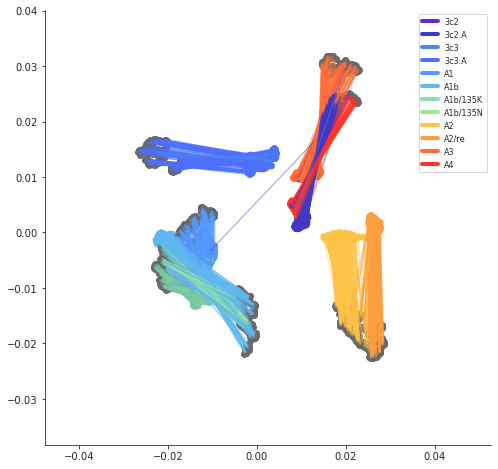

In [72]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors

x = merged_scaled_df["umap_ha_scaled_x"].values
y = merged_scaled_df["umap_ha_scaled_y"].values

pos_x = merged_scaled_df["umap_concat_scaled_x"].values
pos_y = merged_scaled_df["umap_concat_scaled_y"].values

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(pos_x, pos_y, c=val)
ax.scatter(x, y, c="#696969")
line_segments = LineCollection(line_segments, linewidths=(0.5, 1, 1.5, 2), color=val, linestyle='solid', alpha=0.5)
ax.add_collection(line_segments)
#ax.quiver(x, y, pos_x, pos_y, zorder=5, angles='xy', scale_units='xy', scale=1)
ax.set_xlim(min(pos_x) - .025 , max(pos_x) + .025)
ax.set_ylim(min(pos_y) - .025 , max(pos_y) + .025)
ax.legend(handles=legend_elements, loc=1)
plt.savefig(snakemake.output.UMAPProcrustes)
plt.show()

In [73]:
list_of_chart = linking_tree_with_plots_brush(
    merged_umap_df_ha,
    ['umap_x','umap_y'],
    ['umap_x','umap_y'],
    'clade_membership:N',
    ["strain:N", "clade_membership:N"],
    domain,
    range_
)
chart_umap = list_of_chart[0]|list_of_chart[1]
chart_umap

alt.HConcatChart(...)

In [74]:
list_of_chart_concatenated = linking_tree_with_plots_brush(
    merged_umap_df_concatenated,
    ['umap_x','umap_y'],
    ['umap_x','umap_y'],
    'clade_membership:N',
    ["strain:N", "clade_membership:N"],
    domain,
    range_
)
chart_umap_concatenated = list_of_chart_concatenated[0]|list_of_chart_concatenated[1]
chart_umap_concatenated

alt.HConcatChart(...)

In [75]:
chart_umap & chart_umap_concatenated

alt.VConcatChart(...)

# Trying out AlignUMAP

# Linking all plots together clickable with Tree

In [47]:
#merged_df = node_df.merge(
#    PrincipalDf_concatenated.merge)
merged_df = node_df_ha[["strain", "date", "y", "clade_membership"]].merge(
    principalDf_concatenated,
    on="strain"
).merge(
    MDS_df_concatenated,
    on="strain"
).merge(
    TSNE_df_concatenated,
    on="strain"
).merge(
    UMAP_df_concatenated,
    on="strain"
)

In [49]:
merged_df

strain     date     y clade_membership       pca1  \
0      A/RobatKarim/21210/2016  2016.05     1              3c3  11.993968   
1      A/MUWRP-Uganda/579/2016  2016.67     2              3c3  -3.321925   
2             A/Sydney/29/2016  2016.03     3              3c3  11.949725   
3       A/Pennsylvania/08/2016  2016.02     4              3c3  -3.638844   
4           A/Arkansas/02/2016  2016.08     5              3c3  -3.637416   
...                        ...      ...   ...              ...        ...   
1638        A/Missouri/31/2017  2017.80  1639         A1b/135N  -3.250659   
1639        A/Missouri/37/2017  2017.85  1640         A1b/135N  -3.248858   
1640        A/Maryland/53/2017  2017.74  1641         A1b/135N  -3.553376   
1641       A/Michigan/276/2017  2017.61  1642         A1b/135N  -3.249022   
1642  A/Guangdong/SKLRD01/2017  2017.54  1643         A1b/135N  12.040236   

          pca2      pca3      pca4      pca5      pca6  ...  pca_label  \
0     5.597106 -0.217531 -0.401829  0.671749  0.921810  ...          0   
1     6.289055  0.821978 -0.824434 -0.157834  0.189158  ...         -1   
2     7.715929  0.099199 -0.783084  0.413159  1.647342  ...          0   
3     7.416141  0.397693 -0.693359  0.053840  1.352717  ...         -1   
4     7.392876  0.398988 -0.686973  0.057483  1.350657  ...         -1   
...        ...       ...       ...       ...       ...  ...        ...   
1638 -1.295417 -2.955929 -1.574364  1.531611  0.746617  ...         17   
1639 -1.294595 -2.938325 -1.558281  1.491184  0.720839  ...         17   
1640 -1.206301 -2.985058 -1.678579  1.537032  0.682009  ...         17   
1641 -1.298247 -2.957532 -1.576293  1.526953  0.749348  ...         17   
1642 -0.926585 -3.276806 -1.746969  1.880797  1.023727  ...         -1   

           mds1       mds2  mds_label     tsne_x     tsne_y  t-sne_label  \
0    -30.648177  12.325296         -1  21.314163 -29.440813            6   
1    -66.132513 -17.820883         -1  25.939812 -25.616499            6   
2    -37.527459  48.671727          0  21.431791 -29.107820            6   
3    -59.741953  -2.520550          1  21.417887 -29.127851            6   
4    -62.248260  -5.762971          1  21.417683 -29.128588            6   
...         ...        ...        ...        ...        ...          ...   
1638   4.876526 -25.776907         10 -25.544632 -22.210379           17   
1639   4.779935 -25.596636         10 -25.030390 -22.087532           17   
1640   4.446767 -27.682905         10 -25.903227 -21.670430           17   
1641   4.284006 -24.420213         10 -25.577900 -22.197340           17   
1642   4.205354 -25.595862         10 -25.594381 -22.154129           17   

         umap_x    umap_y  umap_label  
0      2.495441 -0.773218           4  
1     -6.565435  1.480318           0  
2     -6.699243  0.917165           0  
3     -6.881960  0.698305           0  
4     -6.644176  0.894187           0  
...         ...       ...         ...  
1638  16.744390 -9.424256           6  
1639  16.799606 -9.253803           6  
1640  16.888668 -9.603434           6  
1641  16.697538 -9.210176           6  
1642  16.750957 -9.335768           6  

[1643 rows x 24 columns]

In [50]:
data = linking_tree_with_plots_brush(
    node_df_ha.merge(merged_df[["strain"]], on="strain"),
    ['mds1', 'mds2','tsne_x','tsne_y', 'pca1', 'pca2', 'umap_x','umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA1 (Expected Variance : {}%'.format(round(explained_variance_PCA_ha[0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_PCA_ha[1]*100,2)) + ")",'UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain'],
    domain,
    range_
)

In [51]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.vconcat(data[0],embeddings)
fullChart

alt.VConcatChart(...)

In [52]:
filtered_merged_df = merged_df[merged_df["pca1"] < 10].copy()

In [53]:
filtered_merged_df.shape

(1342, 24)

In [54]:
merged_df.shape

(1643, 24)

In [55]:
data = linking_tree_with_plots_brush(
    merged_df,
    ['mds1', 'mds2','tsne_x','tsne_y', 'pca3', 'pca4', 'umap_x','umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA3 (Expected Variance : {}%'.format(round(explained_variance_PCA_concatenated[2]*100,2)) + ")",
    'PCA4 (Expected Variance : {}%'.format(round(explained_variance_PCA_concatenated[3]*100,2)) + ")",'UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain', 'clade_membership'],
    domain,
    range_
)

In [56]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.vconcat(data[0],embeddings)
fullChart

alt.VConcatChart(...)

# Final Chart

In [95]:
merged_df.columns = ['strain', 'date', 'y', 'clade_membership', 'pca1', 'pca2', 'pca3',
       'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca_label',
       'mds1', 'mds2', 'mds_label', 'tsne_x', 'tsne_y', 't-sne_label', 'umap_x',
       'umap_y', 'umap_label']

In [104]:
merged_df

strain     date     y clade_membership       pca1  \
0      A/RobatKarim/21210/2016  2016.05     1              3c3  11.993968   
1      A/MUWRP-Uganda/579/2016  2016.67     2              3c3  -3.321925   
2             A/Sydney/29/2016  2016.03     3              3c3  11.949725   
3       A/Pennsylvania/08/2016  2016.02     4              3c3  -3.638844   
4           A/Arkansas/02/2016  2016.08     5              3c3  -3.637416   
...                        ...      ...   ...              ...        ...   
1638        A/Missouri/31/2017  2017.80  1639         A1b/135N  -3.250659   
1639        A/Missouri/37/2017  2017.85  1640         A1b/135N  -3.248858   
1640        A/Maryland/53/2017  2017.74  1641         A1b/135N  -3.553376   
1641       A/Michigan/276/2017  2017.61  1642         A1b/135N  -3.249022   
1642  A/Guangdong/SKLRD01/2017  2017.54  1643         A1b/135N  12.040236   

          pca2      pca3      pca4      pca5      pca6  ...  pca_label  \
0     5.597106 -0.217531 -0.401829  0.671749  0.921810  ...          0   
1     6.289055  0.821978 -0.824434 -0.157834  0.189158  ...         -1   
2     7.715929  0.099199 -0.783084  0.413159  1.647342  ...          0   
3     7.416141  0.397693 -0.693359  0.053840  1.352717  ...         -1   
4     7.392876  0.398988 -0.686973  0.057483  1.350657  ...         -1   
...        ...       ...       ...       ...       ...  ...        ...   
1638 -1.295417 -2.955929 -1.574364  1.531611  0.746617  ...         17   
1639 -1.294595 -2.938325 -1.558281  1.491184  0.720839  ...         17   
1640 -1.206301 -2.985058 -1.678579  1.537032  0.682009  ...         17   
1641 -1.298247 -2.957532 -1.576293  1.526953  0.749348  ...         17   
1642 -0.926585 -3.276806 -1.746969  1.880797  1.023727  ...         -1   

           mds1       mds2  mds_label     tsne_x     tsne_y  t-sne_label  \
0    -30.648177  12.325296         -1  21.314163 -29.440813            6   
1    -66.132513 -17.820883         -1  25.939812 -25.616499            6   
2    -37.527459  48.671727          0  21.431791 -29.107820            6   
3    -59.741953  -2.520550          1  21.417887 -29.127851            6   
4    -62.248260  -5.762971          1  21.417683 -29.128588            6   
...         ...        ...        ...        ...        ...          ...   
1638   4.876526 -25.776907         10 -25.544632 -22.210379           17   
1639   4.779935 -25.596636         10 -25.030390 -22.087532           17   
1640   4.446767 -27.682905         10 -25.903227 -21.670430           17   
1641   4.284006 -24.420213         10 -25.577900 -22.197340           17   
1642   4.205354 -25.595862         10 -25.594381 -22.154129           17   

         umap_x    umap_y  umap_label  
0      2.495441 -0.773218           4  
1     -6.565435  1.480318           0  
2     -6.699243  0.917165           0  
3     -6.881960  0.698305           0  
4     -6.644176  0.894187           0  
...         ...       ...         ...  
1638  16.744390 -9.424256           6  
1639  16.799606 -9.253803           6  
1640  16.888668 -9.603434           6  
1641  16.697538 -9.210176           6  
1642  16.750957 -9.335768           6  

[1643 rows x 24 columns]

In [96]:
node_df_ha.columns = ['strain', 'date_ha', 'pca1_ha', 'pca2_ha', 'pca3_ha', 'pca4_ha', 'mds1_ha', 'mds2_ha',
       'tsne_x_ha', 'tsne_y_ha', 'umap_x_ha', 'umap_y_ha',
       'clade_membership_ha', 'pca_label_ha', 'mds_label_ha', 'umap_label_ha',
       't-sne_label_ha', 'y']

In [97]:
node_df_ha

strain  date_ha  pca1_ha  pca2_ha  pca3_ha  pca4_ha  \
0      A/RobatKarim/21210/2016  2016.05     4.12     0.42    -0.28    -0.21   
1      A/MUWRP-Uganda/579/2016  2016.67     4.91     1.18    -0.48     0.10   
2             A/Sydney/29/2016  2016.03     6.52     1.08    -0.50     0.36   
3       A/Pennsylvania/08/2016  2016.02     6.55     1.09    -0.51     0.37   
4           A/Arkansas/02/2016  2016.08     6.52     1.09    -0.50     0.36   
...                        ...      ...      ...      ...      ...      ...   
1638        A/Missouri/31/2017  2017.80    -0.24    -2.97    -1.71    -2.06   
1639        A/Missouri/37/2017  2017.85    -0.25    -2.97    -1.71    -2.06   
1640        A/Maryland/53/2017  2017.74    -0.24    -2.97    -1.70    -2.06   
1641       A/Michigan/276/2017  2017.61    -0.24    -2.97    -1.70    -2.06   
1642  A/Guangdong/SKLRD01/2017  2017.54    -0.24    -2.97    -1.70    -2.06   

      mds1_ha  mds2_ha  tsne_x_ha  tsne_y_ha  umap_x_ha  umap_y_ha  \
0       19.39    -0.91      12.62       1.28       3.96      17.76   
1       33.07    21.34      13.53      -1.19     -11.96       3.24   
2       31.32   -17.25      12.11       2.10     -12.19       2.34   
3       31.73   -16.46      12.15       2.05     -12.30       2.47   
4       34.50     9.64      12.14       2.04     -12.22       2.35   
...       ...      ...        ...        ...        ...        ...   
1638    -6.77    15.81      22.54     -48.51       4.41      -8.71   
1639    -7.89    17.03      22.85     -49.45       4.66      -9.20   
1640    -6.67    15.81      22.74     -48.67       4.40      -8.58   
1641    -6.00    14.70      22.66     -48.60       4.07      -8.10   
1642    -6.00    14.70      22.66     -48.60       4.12      -8.18   

     clade_membership_ha  pca_label_ha  mds_label_ha  umap_label_ha  \
0                    3c3            -1            -1              5   
1                    3c3            -1            -1              3   
2                    3c3            -1             0              3   
3                    3c3            -1             0              3   
4                    3c3            -1             0              3   
...                  ...           ...           ...            ...   
1638            A1b/135N             5             5              1   
1639            A1b/135N             5             5              1   
1640            A1b/135N             5             5              1   
1641            A1b/135N             5             5              1   
1642            A1b/135N             5             5              1   

      t-sne_label_ha     y  
0                 -1     1  
1                 15     2  
2                 -1     3  
3                 -1     4  
4                 -1     5  
...              ...   ...  
1638              13  1639  
1639              13  1640  
1640              13  1641  
1641              13  1642  
1642              13  1643  

[1643 rows x 18 columns]

In [98]:
total_df = merged_df.merge(node_df_ha, on="strain")
total_df.rename(columns={'y_x':"y"}, inplace=True)

In [99]:
total_df

strain     date     y clade_membership       pca1  \
0      A/RobatKarim/21210/2016  2016.05     1              3c3  11.993968   
1      A/MUWRP-Uganda/579/2016  2016.67     2              3c3  -3.321925   
2             A/Sydney/29/2016  2016.03     3              3c3  11.949725   
3       A/Pennsylvania/08/2016  2016.02     4              3c3  -3.638844   
4           A/Arkansas/02/2016  2016.08     5              3c3  -3.637416   
...                        ...      ...   ...              ...        ...   
1638        A/Missouri/31/2017  2017.80  1639         A1b/135N  -3.250659   
1639        A/Missouri/37/2017  2017.85  1640         A1b/135N  -3.248858   
1640        A/Maryland/53/2017  2017.74  1641         A1b/135N  -3.553376   
1641       A/Michigan/276/2017  2017.61  1642         A1b/135N  -3.249022   
1642  A/Guangdong/SKLRD01/2017  2017.54  1643         A1b/135N  12.040236   

          pca2      pca3      pca4      pca5      pca6  ...  tsne_x_ha  \
0     5.597106 -0.217531 -0.401829  0.671749  0.921810  ...      12.62   
1     6.289055  0.821978 -0.824434 -0.157834  0.189158  ...      13.53   
2     7.715929  0.099199 -0.783084  0.413159  1.647342  ...      12.11   
3     7.416141  0.397693 -0.693359  0.053840  1.352717  ...      12.15   
4     7.392876  0.398988 -0.686973  0.057483  1.350657  ...      12.14   
...        ...       ...       ...       ...       ...  ...        ...   
1638 -1.295417 -2.955929 -1.574364  1.531611  0.746617  ...      22.54   
1639 -1.294595 -2.938325 -1.558281  1.491184  0.720839  ...      22.85   
1640 -1.206301 -2.985058 -1.678579  1.537032  0.682009  ...      22.74   
1641 -1.298247 -2.957532 -1.576293  1.526953  0.749348  ...      22.66   
1642 -0.926585 -3.276806 -1.746969  1.880797  1.023727  ...      22.66   

      tsne_y_ha  umap_x_ha  umap_y_ha  clade_membership_ha  pca_label_ha  \
0          1.28       3.96      17.76                  3c3            -1   
1         -1.19     -11.96       3.24                  3c3            -1   
2          2.10     -12.19       2.34                  3c3            -1   
3          2.05     -12.30       2.47                  3c3            -1   
4          2.04     -12.22       2.35                  3c3            -1   
...         ...        ...        ...                  ...           ...   
1638     -48.51       4.41      -8.71             A1b/135N             5   
1639     -49.45       4.66      -9.20             A1b/135N             5   
1640     -48.67       4.40      -8.58             A1b/135N             5   
1641     -48.60       4.07      -8.10             A1b/135N             5   
1642     -48.60       4.12      -8.18             A1b/135N             5   

      mds_label_ha  umap_label_ha  t-sne_label_ha   y_y  
0               -1              5              -1     1  
1               -1              3              15     2  
2                0              3              -1     3  
3                0              3              -1     4  
4                0              3              -1     5  
...            ...            ...             ...   ...  
1638             5              1              13  1639  
1639             5              1              13  1640  
1640             5              1              13  1641  
1641             5              1              13  1642  
1642             5              1              13  1643  

[1643 rows x 41 columns]

In [100]:
total_df["date"].max() + 0.2

2018.76

In [106]:
data = linking_tree_with_plots_brush(
    total_df,
    ['mds1', 'mds2', 'mds1_ha', 'mds2_ha','tsne_x','tsne_y', 'tsne_x_ha', 'tsne_y_ha', 'pca1', 'pca2','pca1_ha', 'pca2_ha', 'umap_x','umap_y', 'umap_x_ha', 'umap_y_ha'],
    ['MDS1', 'MDS2', 'MDS1', 'MDS2', 'TSNE1', 'TSNE2', 'TSNE1', 'TSNE2', 
    'PCA1 (Expected Variance : {}%'.format(round(explained_variance_PCA_concatenated[0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_PCA_concatenated[1]*100,2)) + ")",
    'PCA1 (Expected Variance : {}%'.format(round(explained_variance_PCA_ha[0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_PCA_ha[1]*100,2)) + ")",'UMAP1','UMAP2','UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain', 'clade_membership'],
    domain,
    range_
)

In [107]:
chart_embeddings = alt.vconcat(data[6]|data[5], data[2]|data[1], data[4]|data[3], data[8]|data[7])
chart_embeddings
chart_embeddings.save("../docs/FullLinkedChartBrushableFluHaNa.html")
save(chart_embeddings, "../docs/flu-embeddingsHaNa.png", scale_factor=2.0)

## Within- and between-clade Euclidean distances for all embeddings

Use the complete embedding data frame to calculate pairwise Euclidean distances between samples and plot the results in a single figure.

In [181]:
Genetic_KDE_df_ha = pd.read_csv("results/KDEDensity_genetic_ha.csv")
Genetic_KDE_df_concatenated = pd.read_csv("results/KDEDensity_genetic_concatenated.csv")
Genetic_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_genetic_metadata_ha.csv")
Genetic_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_genetic_metadata_concatenated.csv")

In [182]:
MDS_KDE_df_ha = pd.read_csv("results/KDEDensity_mds_ha.csv")
MDS_KDE_df_concatenated = pd.read_csv("results/KDEDensity_mds_concatenated.csv")
MDS_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_mds_metadata_ha.csv")
MDS_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_mds_metadata_concatenated.csv")

UMAP_KDE_df_ha = pd.read_csv("results/KDEDensity_umap_ha.csv")
UMAP_KDE_df_concatenated = pd.read_csv("results/KDEDensity_umap_concatenated.csv")
UMAP_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_umap_metadata_ha.csv")
UMAP_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_umap_metadata_concatenated.csv")

In [183]:
MDS_KDE_metadata_df_concatenated

MCC  accuracy  median_within  median_between  threshold embedding  \
0  0.616     0.884          -1.37          -0.013     -0.862       mds   

        TN     FN      TP      FP  
0  1049049  18223  143420  138211

In [184]:
import matplotlib.gridspec as gridspec

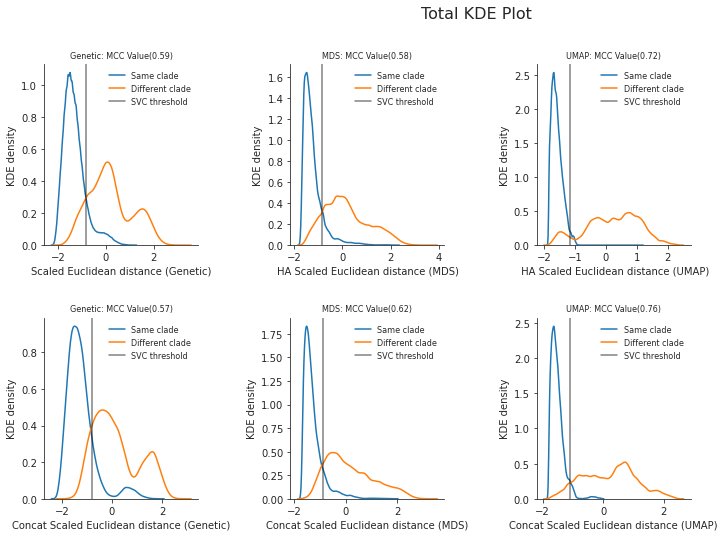

In [185]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
sns.set_style("ticks")
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 3, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])


#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic: MCC Value(' + str(round(Genetic_KDE_metadata_df_ha["MCC"].values.tolist()[0],2))+ ')')
ax1.set_xlabel("HA-only Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#Genetic
ax4 = sns.kdeplot(Genetic_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(Genetic_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=Genetic_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.legend(frameon=False)
ax4.set_title('Genetic: MCC Value(' + str(round(Genetic_KDE_metadata_df_concatenated["MCC"].values.tolist()[0],2))+ ')')
ax4.set_xlabel("HA and NA Scaled Euclidean distance (Genetic)")
ax4.set_ylabel("KDE density")

#MDS
ax5 = sns.kdeplot(MDS_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(MDS_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=MDS_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.legend(frameon=False)
ax5.set_title('MDS: MCC Value(' + str(round(MDS_KDE_metadata_df_concatenated["MCC"].values.tolist()[0],2))+ ')')
ax5.set_xlabel("HA and NA Scaled Euclidean distance (MDS)")
ax5.set_ylabel("KDE density")

#MDS
ax2 = sns.kdeplot(MDS_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(MDS_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=MDS_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title('MDS: MCC Value(' + str(round(MDS_KDE_metadata_df_ha["MCC"].values.tolist()[0],2))+ ')')
ax2.set_xlabel("HA-only Scaled Euclidean distance (MDS)")
ax2.set_ylabel("KDE density")

#UMAP
ax6 = sns.kdeplot(UMAP_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax6)
ax6 = sns.kdeplot(UMAP_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax6)
ax6.axvline(x=UMAP_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax6.legend(frameon=False)
ax6.set_title('UMAP: MCC Value(' + str(round(UMAP_KDE_metadata_df_concatenated["MCC"].values.tolist()[0],2))+ ')')
ax6.set_xlabel("HA and NA Scaled Euclidean distance (UMAP)")
ax6.set_ylabel("KDE density")

#UMAP
ax3 = sns.kdeplot(UMAP_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(UMAP_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=UMAP_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.legend(frameon=False)
ax3.set_title('UMAP: MCC Value(' + str(round(UMAP_KDE_metadata_df_ha["MCC"].values.tolist()[0],2))+ ')')
ax3.set_xlabel(" HA-only Scaled Euclidean distance (UMAP)")
ax3.set_ylabel("KDE density")

sns.despine()
plt.tight_layout()
plt.savefig(snakemake.output.KDE_density)
#plt.savefig("../docs/FinalKDEPlotHACONCAT.png", dpi=600, bbox_inches='tight')

In [ ]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])



#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade HA", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade HA", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

#Genetic
ax1 = sns.kdeplot(Genetic_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade CONCAT", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade CONCAT", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#MDS
ax2 = sns.kdeplot(MDS_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade HA", ax=ax2)
ax2 = sns.kdeplot(MDS_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade HA", ax=ax2)
ax2.axvline(x=MDS_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

#MDS
ax2 = sns.kdeplot(MDS_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade CONCAT", ax=ax2)
ax2 = sns.kdeplot(MDS_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade CONCAT", ax=ax2)
ax2.axvline(x=MDS_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title('MDS')
ax2.set_xlabel("Scaled Euclidean distance (MDS)")
ax2.set_ylabel("KDE density")

#UMAP
ax3 = sns.kdeplot(UMAP_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade HA", ax=ax3)
ax3 = sns.kdeplot(UMAP_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade HA", ax=ax3)
ax3.axvline(x=UMAP_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

#UMAP
ax3 = sns.kdeplot(UMAP_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade CONCAT", ax=ax3)
ax3 = sns.kdeplot(UMAP_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade CONCAT", ax=ax3)
ax3.axvline(x=UMAP_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.legend(frameon=False)
ax3.set_title('UMAP')
ax3.set_xlabel("Scaled Euclidean distance (UMAP)")
ax3.set_ylabel("KDE density")


fig.suptitle('KDE Plot', fontsize=16)
sns.despine()
#plt.savefig("../docs/FinalHAKDEPlot.png", dpi=600, bbox_inches='tight')